In [112]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import seaborn as sns

In [146]:
def collect_losses(root_dir):

    depth = 2

    dict_res_roberta = dict()
    dict_res_camem = dict()
    dict_res_xlm = dict()
    
    for subdir, dirs, files in os.walk(root_dir):
        if subdir[len(root_dir):].count(os.sep) < depth:
            for file_ in files:
                if file_ == "test_results.json":
                    with open(subdir + "/" + file_) as f:
                        d = json.load(f)
                        test_mse = round(d["test_mse"], 2)
                        test_r2 = round(d["test_r2"], 2)
                        
                    model_type = subdir.split(os.sep)[-1].split("_")[0]
                    if model_type == "roberta":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_roberta[dataset_name] = {"mse": test_mse, "r2": test_r2}
                    elif model_type == "xlm":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_xlm[dataset_name] = {"mse": test_mse, "r2": test_r2}
                    elif model_type == "camem":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_camem[dataset_name] = {"mse": test_mse, "r2": test_r2}

    return dict(sorted(dict_res_roberta.items())), dict(sorted(dict_res_camem.items())), dict(sorted(dict_res_xlm.items()))


def collect_corrs(root_dir):

    depth = 2

    dict_res_roberta = dict()
    dict_res_camem = dict()
    dict_res_xlm = dict()
    
    for subdir, dirs, files in os.walk(root_dir):
        if subdir[len(root_dir):].count(os.sep) < depth:
            for file_ in files:
                if file_ == "ouput.json":
                    with open(subdir + "/" + file_) as f:
                        d = json.load(f)
                        test_corr_s = round(d["test_corr_s"], 2)
                        test_corr_p = round(d["test_corr_p"], 2)
                        
                    model_type = subdir.split(os.sep)[-1].split("_")[0]
                    if model_type == "roberta":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_roberta[dataset_name] = {"corr_s": test_corr_s, "corr_p": test_corr_p}
                    elif model_type == "xlm":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_xlm[dataset_name] = {"corr_s": test_corr_s, "corr_p": test_corr_p}
                    elif model_type == "camem":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_camem[dataset_name] = {"corr_s": test_corr_s, "corr_p": test_corr_p}

    return dict(sorted(dict_res_roberta.items())), dict(sorted(dict_res_camem.items())), dict(sorted(dict_res_xlm.items()))


def update_dicts(dict_1, dict_2):
    for k, v in dict_2.items():
        if k == "p nf en":
            dict_1["p nf"] = {**dict_1["p nf"], **dict_2[k]} 
        elif k == "np nf en":
            dict_1["np nf"] = {**dict_1["np nf"], **dict_2[k]} 
        elif k == "p nf it":
            dict_1["p nf"] = {**dict_1["p nf"], **dict_2[k]} 
        elif k == "np nf it":
            dict_1["np nf"] = {**dict_1["np nf"], **dict_2[k]} 
        else:
            dict_1[k] = {**dict_1[k], **dict_2[k]} 
            
            
def update_dicts_xlm(dict_1, dict_2):
    for k, v in dict_2.items():
        if k == "p nf en":
            dict_1["en p nf"] = {**dict_1["en p nf"], **dict_2[k]} 
        elif k == "np nf en":
            dict_1["en np nf"] = {**dict_1["en np nf"], **dict_2[k]} 
        elif k == "p nf it":
            dict_1["it p nf"] = {**dict_1["it p nf"], **dict_2[k]} 
        elif k == "np nf it":
            dict_1["it np nf"] = {**dict_1["it np nf"], **dict_2[k]} 
        else:
            dict_1[k] = {**dict_1[k], **dict_2[k]} 



def average_en_p_rows(s):
    s = s[[" f" in x for x in s.index]]
    s = s[[" en" in x for x in s.index]]
    s = s[[not "np " in x for x in s.index]]
    return s.mean()

def average_en_np_rows(s):
    s = s[[" f" in x for x in s.index]]
    s = s[[all([x in i for x in ["np ", " en"]]) for i in s.index]]
    return s.mean()

def average_it_p_rows(s):
    s = s[[" f" in x for x in s.index]]
    s = s[[" it" in x for x in s.index]]
    s = s[[not "np " in x for x in s.index]]
    return s.mean()

def average_it_np_rows(s):
    s = s[[" f" in x for x in s.index]]
    s = s[[all([x in i for x in ["np ", " it"]]) for i in s.index]]
    return s.mean()

def process_to_present(df_res, column_width="1.1cm", plot_transpose=True):
    # df_res = df_res.rename(columns=mapping_columns_names)
    if not plot_transpose:
        df_res = df_res.T
    s = df_res.style
    s.format(na_rep='MISS', precision=2)
    print(s.to_latex(column_format='l'+('p{'+f'{column_width}'+'}')*len(df_res.columns)))

In [147]:
res_roberta, res_camem, res_xlm = collect_losses("../output/complexity")

In [148]:
corr_roberta, corr_camem, corr_xlm = collect_corrs("../output/corr_complexity")

In [149]:
update_dicts(res_roberta, corr_roberta)
update_dicts(res_camem, corr_camem)
update_dicts_xlm(res_xlm, corr_xlm)

## ROBERTA

In [150]:
df_roberta = pd.DataFrame(res_roberta).T
avg_p = df_roberta.apply(average_en_p_rows)
avg_np = df_roberta.apply(average_en_np_rows)
df_roberta.loc["average p"] = avg_p
df_roberta.loc["average np"] = avg_np

In [151]:
df_roberta

,mse,r2,corr_s,corr_p
np f en49,0.220,0.700,0.850,0.850
np f en57,0.200,0.730,0.850,0.860
np f en6,0.180,0.750,0.860,0.870
np f en83,0.220,0.700,0.850,0.850
np f en98,0.210,0.720,0.860,0.860
np nf,0.190,0.740,0.860,0.860
p f en49,0.140,0.800,0.900,0.900
p f en57,0.160,0.790,0.900,0.900
p f en6,0.160,0.790,0.900,0.900
p f en83,0.150,0.790,0.900,0.890


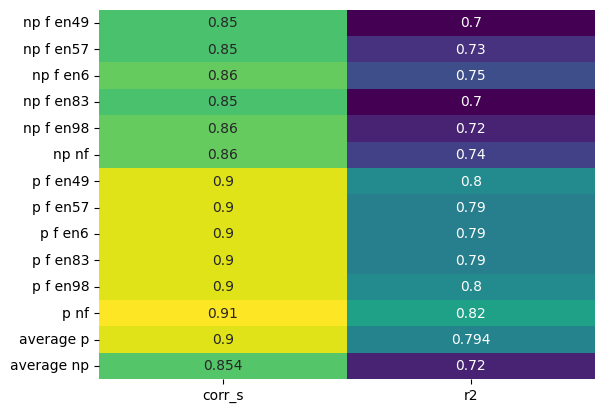

In [152]:
sns.heatmap(df_roberta[["corr_s", "r2"]], annot=True, fmt="g", cmap='viridis', cbar=False)
plt.show()

In [153]:
process_to_present(df_roberta)

\begin{tabular}{lp{1.1cm}p{1.1cm}p{1.1cm}p{1.1cm}}
 & mse & r2 & corr_s & corr_p \\
np f en49 & 0.22 & 0.70 & 0.85 & 0.85 \\
np f en57 & 0.20 & 0.73 & 0.85 & 0.86 \\
np f en6 & 0.18 & 0.75 & 0.86 & 0.87 \\
np f en83 & 0.22 & 0.70 & 0.85 & 0.85 \\
np f en98 & 0.21 & 0.72 & 0.86 & 0.86 \\
np nf & 0.19 & 0.74 & 0.86 & 0.86 \\
p f en49 & 0.14 & 0.80 & 0.90 & 0.90 \\
p f en57 & 0.16 & 0.79 & 0.90 & 0.90 \\
p f en6 & 0.16 & 0.79 & 0.90 & 0.90 \\
p f en83 & 0.15 & 0.79 & 0.90 & 0.89 \\
p f en98 & 0.14 & 0.80 & 0.90 & 0.90 \\
p nf & 0.13 & 0.82 & 0.91 & 0.91 \\
average p & 0.15 & 0.79 & 0.90 & 0.90 \\
average np & 0.21 & 0.72 & 0.85 & 0.86 \\
\end{tabular}



## CAMEM

In [154]:
df_camem = pd.DataFrame(res_camem).T
avg_p = df_camem.apply(average_it_p_rows)
avg_np = df_camem.apply(average_it_np_rows)
df_camem.loc["average p"] = avg_p
df_camem.loc["average np"] = avg_np

In [155]:
df_camem

,mse,r2,corr_s,corr_p
np f it1,0.380,0.550,0.770,0.780
np f it26,0.360,0.570,0.760,0.770
np f it38,0.340,0.590,0.780,0.780
np f it43,0.360,0.570,0.760,0.770
np f it44,0.370,0.560,0.780,0.780
np nf,0.370,0.570,0.780,0.770
p f it1,0.240,0.720,0.860,0.860
p f it26,0.280,0.670,0.850,0.850
p f it38,0.250,0.700,0.850,0.850
p f it43,0.250,0.710,0.860,0.860


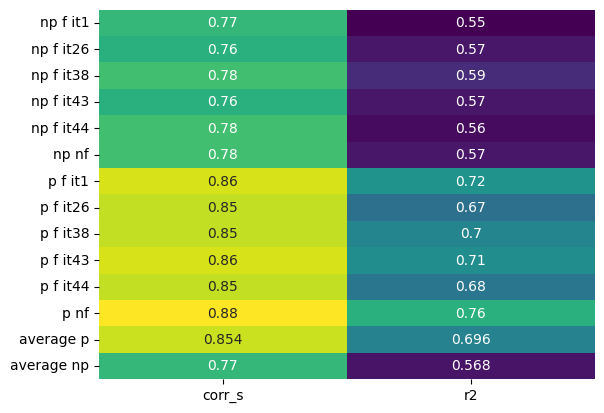

In [160]:
sns.heatmap(df_camem[["corr_s", "r2"]], annot=True, fmt="g", cmap='viridis', cbar=False)
plt.show()

In [156]:
process_to_present(df_camem)

\begin{tabular}{lp{1.1cm}p{1.1cm}p{1.1cm}p{1.1cm}}
 & mse & r2 & corr_s & corr_p \\
np f it1 & 0.38 & 0.55 & 0.77 & 0.78 \\
np f it26 & 0.36 & 0.57 & 0.76 & 0.77 \\
np f it38 & 0.34 & 0.59 & 0.78 & 0.78 \\
np f it43 & 0.36 & 0.57 & 0.76 & 0.77 \\
np f it44 & 0.37 & 0.56 & 0.78 & 0.78 \\
np nf & 0.37 & 0.57 & 0.78 & 0.77 \\
p f it1 & 0.24 & 0.72 & 0.86 & 0.86 \\
p f it26 & 0.28 & 0.67 & 0.85 & 0.85 \\
p f it38 & 0.25 & 0.70 & 0.85 & 0.85 \\
p f it43 & 0.25 & 0.71 & 0.86 & 0.86 \\
p f it44 & 0.27 & 0.68 & 0.85 & 0.85 \\
p nf & 0.20 & 0.76 & 0.88 & 0.88 \\
average p & 0.26 & 0.70 & 0.85 & 0.85 \\
average np & 0.36 & 0.57 & 0.77 & 0.78 \\
\end{tabular}



## XLM

In [157]:
df_xlm = pd.DataFrame(res_xlm).T
en_avg_p = df_xlm.apply(average_en_p_rows)
en_avg_np = df_xlm.apply(average_en_np_rows)
it_avg_p = df_xlm.apply(average_it_p_rows)
it_avg_np = df_xlm.apply(average_it_np_rows)
df_xlm.loc["en average p"] = en_avg_p
df_xlm.loc["en average np"] = en_avg_np
df_xlm.loc["it average p"] = it_avg_p
df_xlm.loc["it average np"] = it_avg_np

In [158]:
df_xlm

,mse,r2,corr_s,corr_p
en np nf,0.190,0.740,0.870,0.870
en p nf,0.150,0.790,0.900,0.900
it np nf,0.330,0.610,0.790,0.800
it p nf,0.230,0.730,0.860,0.860
np f en49,0.230,0.690,0.840,0.840
np f en57,0.210,0.720,0.850,0.850
np f en6,0.240,0.680,0.840,0.840
np f en83,0.220,0.710,0.840,0.840
np f en98,0.200,0.730,0.860,0.860
np f it1,0.310,0.640,0.800,0.800


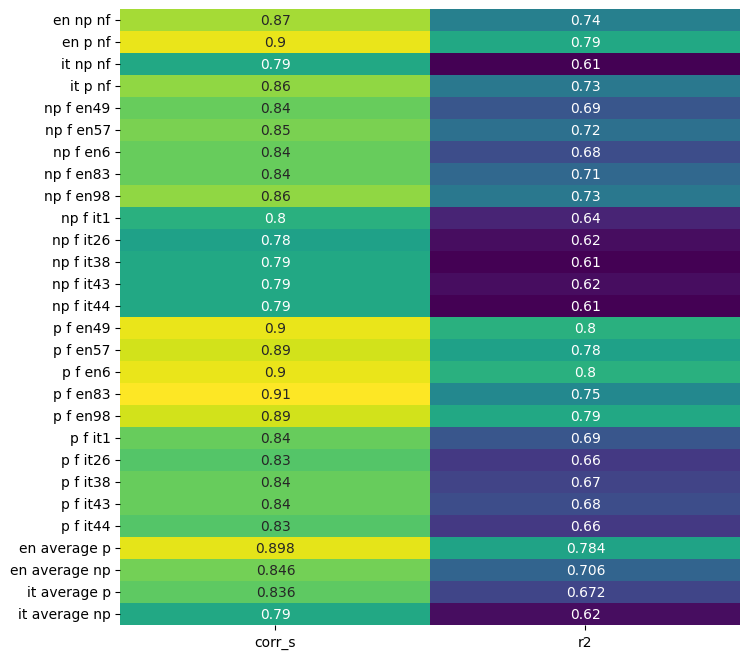

In [164]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_xlm[["corr_s", "r2"]], annot=True, fmt="g", cmap='viridis', cbar=False)
plt.show()

In [159]:
process_to_present(df_xlm)

\begin{tabular}{lp{1.1cm}p{1.1cm}p{1.1cm}p{1.1cm}}
 & mse & r2 & corr_s & corr_p \\
en np nf & 0.19 & 0.74 & 0.87 & 0.87 \\
en p nf & 0.15 & 0.79 & 0.90 & 0.90 \\
it np nf & 0.33 & 0.61 & 0.79 & 0.80 \\
it p nf & 0.23 & 0.73 & 0.86 & 0.86 \\
np f en49 & 0.23 & 0.69 & 0.84 & 0.84 \\
np f en57 & 0.21 & 0.72 & 0.85 & 0.85 \\
np f en6 & 0.24 & 0.68 & 0.84 & 0.84 \\
np f en83 & 0.22 & 0.71 & 0.84 & 0.84 \\
np f en98 & 0.20 & 0.73 & 0.86 & 0.86 \\
np f it1 & 0.31 & 0.64 & 0.80 & 0.80 \\
np f it26 & 0.32 & 0.62 & 0.78 & 0.79 \\
np f it38 & 0.33 & 0.61 & 0.79 & 0.79 \\
np f it43 & 0.32 & 0.62 & 0.79 & 0.80 \\
np f it44 & 0.33 & 0.61 & 0.79 & 0.79 \\
p f en49 & 0.14 & 0.80 & 0.90 & 0.90 \\
p f en57 & 0.16 & 0.78 & 0.89 & 0.89 \\
p f en6 & 0.15 & 0.80 & 0.90 & 0.90 \\
p f en83 & 0.18 & 0.75 & 0.91 & 0.90 \\
p f en98 & 0.15 & 0.79 & 0.89 & 0.89 \\
p f it1 & 0.26 & 0.69 & 0.84 & 0.83 \\
p f it26 & 0.29 & 0.66 & 0.83 & 0.82 \\
p f it38 & 0.28 & 0.67 & 0.84 & 0.83 \\
p f it43 & 0.27 & 0.68 & 0.84 & 